In [1]:
# sudo apt install graphviz -y

In [2]:
!pip install jedi
!pip install pydot


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
%config IPCompleter.use_jedi=True

In [4]:
import numpy as np
from tensorflow.keras import datasets, utils

2024-03-20 09:41:07.650633: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-20 09:41:07.693881: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 09:41:08.529017: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, utils

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10

# Convert the labels to one hot encoding
y_train = utils.to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = utils.to_categorical(y_test, num_classes=NUM_CLASSES)


# Define a function to preprocess the images
def preprocess_images(images):
    images = tf.cast(images, tf.float32) / 255.0
    return images


# Define a function to preprocess the data
def preprocess_data(images, labels):
    images = preprocess_images(images)
    return images, labels


# Convert the numpy arrays to tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Use the .map method to apply the preprocessing function to the dataset
train_ds = train_ds.map(preprocess_data).shuffle(True).batch(32)

test_ds = test_ds.map(preprocess_data).batch(32)

2024-03-20 09:41:09.787898: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:f3:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 09:41:09.823125: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:f3:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 09:41:09.823192: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:f3:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 09:41:09.825303: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:f3:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 09:41:09.825351: I external/local_xla/xla/stream_executor

In [6]:
from tensorflow.keras import layers, models

In [7]:
input_layer = layers.Input(shape=(32, 32, 3))

x = layers.Flatten()(input_layer)

x = layers.Dense(units=200, activation="relu")(x)

x = layers.Dense(units=150, activation="relu")(x)
output_layer = layers.Dense(units=10, activation="softmax")(x)
model = models.Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.0005)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

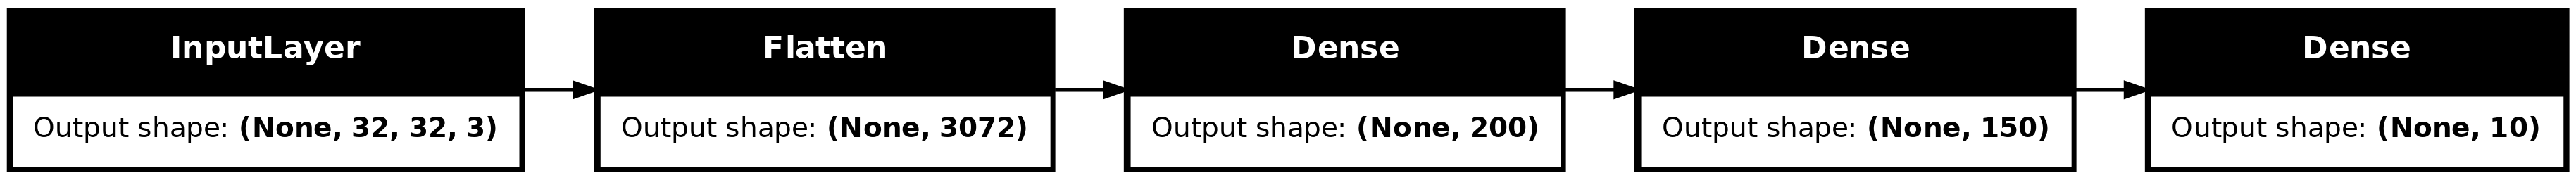

In [10]:
import tensorflow as tf
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True, rankdir="LR")

In [11]:
model.fit(
    train_ds,
    epochs=10,
)

Epoch 1/10


I0000 00:00:1710902471.384156   65951 service.cc:145] XLA service 0x7f1c04009000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1710902471.384213   65951 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-03-20 09:41:11.406898: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-20 09:41:11.501262: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1710902472.908079   66010 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_413', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1710902473.436070   66013 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_413', 80 bytes spill stores, 80 bytes spill loads

  59/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1388 - loss: 2.3075

I0000 00:00:1710902476.050151   65951 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.2886 - loss: 1.9566
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3949 - loss: 1.6862
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4308 - loss: 1.5980
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4500 - loss: 1.5345
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4674 - loss: 1.4895
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4779 - loss: 1.4549
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4905 - loss: 1.4250
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4996 - loss: 1.4002
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5082 - loss: 1.3753
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5155 - loss: 1.3580


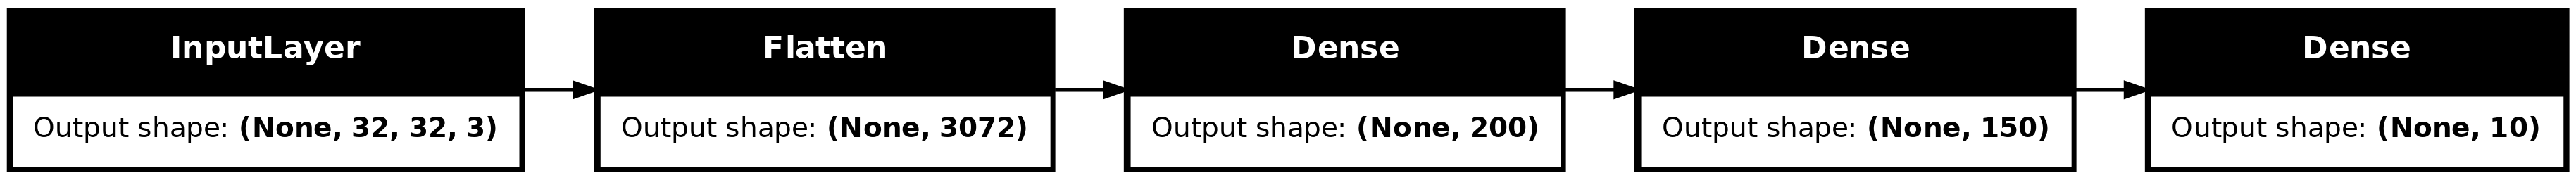

In [12]:
utils.plot_model(model, show_shapes=True, rankdir="LR")

In [13]:
model.evaluate(test_ds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4891 - loss: 1.4505


[1.4605733156204224, 0.48919999599456787]

In [14]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)
preds = model.predict(test_ds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [15]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]

In [16]:
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

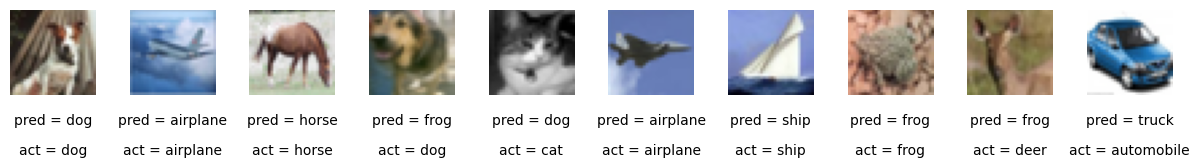

In [17]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)